In [21]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.utils import timeseries_dataset_from_array
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
BTC_df = pd.read_csv(
    Path('derived_data/crypto_BTC_5min.csv')
)

In [3]:
BTC_df.head()

,system_time,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,...,bids_limit_cum_quantity_14,bids_limit_notional_14,bids_limit_cum_notional_14,asks_distance_14,asks_price_14,asks_limit_quantity_14,asks_limit_cum_quantity_14,asks_limit_notional_14,bids_asks_imbalance_limit_notional_14,asks_limit_cum_notional_14
0,2021-04-07 11:37:41.122161+00:00,55899.995,0.01,1.199304e+07,1.348616e+07,0.470699,-8.944544e-08,55899.99,0.363289,0.363289,...,2.676582,500.000000,1.495714e+05,0.000787,55944.000000,15.829499,61.744002,885565.500000,0.000564,3.452392e+06
1,2021-04-07 11:42:41.122161+00:00,56111.655,0.01,1.029537e+07,5.020347e+06,0.672210,-8.910805e-08,56111.65,0.150000,0.150000,...,3.245218,29264.210938,1.820408e+05,0.000459,56137.430000,0.100000,8.818123,5613.740234,0.839046,4.948874e+05
2,2021-04-07 11:47:41.122161+00:00,56100.015,0.01,3.825363e+06,4.640026e+06,0.451883,-8.912654e-08,56100.01,0.373553,0.373553,...,7.335956,5126.859863,4.115042e+05,0.000531,56129.800002,0.009991,16.142200,560.789978,0.901402,9.056801e+05
3,2021-04-07 11:52:41.122161+00:00,56163.445,5.65,2.876023e+06,3.422145e+06,0.456644,-5.029962e-05,56160.62,0.030336,0.030336,...,4.452110,16081.540039,2.499928e+05,0.000180,56173.580000,0.356061,12.964191,20001.240234,0.445685,7.282168e+05
4,2021-04-07 11:57:41.122161+00:00,56229.995,0.01,2.393997e+06,3.119070e+06,0.434241,-8.892052e-08,56229.99,34.393039,34.393039,...,37.701810,11240.660156,2.119920e+06,0.000135,56237.590000,0.027765,39.034703,1561.459961,0.878031,2.194926e+06


In [4]:
BTC_df.drop("system_time", inplace = True, axis = 1)

In [5]:
BTC_df.shape

(3367, 200)

In [6]:
data_length = BTC_df.shape[0]

train_length = round(0.8*data_length)
train_length

2694

In [7]:
mean_df = BTC_df[:train_length].mean()
std_df = BTC_df[:train_length].std()

normalized_df = (BTC_df - mean_df) / std_df

In [8]:
# Set window size
window_size = 30

# Windows for training dataset
windows_train = timeseries_dataset_from_array(normalized_df[:(train_length)], normalized_df["midpoint"][window_size:(train_length+window_size)], window_size, sequence_stride=1, sampling_rate=1,
    batch_size=64, shuffle=False, seed=None, start_index=None, end_index=None
)


# Windows for test dataset
windows_test = timeseries_dataset_from_array(normalized_df[train_length:(data_length-window_size)], normalized_df["midpoint"][train_length + window_size:], 30, sequence_stride=1, sampling_rate=1,
    batch_size=64, shuffle=False, seed=None, start_index=None, end_index=None
)

In [26]:
model_lstm = keras.Sequential()
model_lstm.add(layers.LSTM(32, return_sequences=True, input_shape=[30, 200]))
model_lstm.add(layers.LSTM(32, return_sequences=False))
model_lstm.add(layers.Dense(16))
model_lstm.add(layers.Dense(1))

model_lstm.compile(loss="mse", optimizer="adam", metrics=["mse"])
history = model_lstm.fit(windows_train, epochs=53,verbose=1)

Epoch 1/53
42/42 [==============================] - 3s 21ms/step - loss: 0.4838 - mse: 0.4838
Epoch 2/53
42/42 [==============================] - 1s 20ms/step - loss: 0.1532 - mse: 0.1532
Epoch 3/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0412 - mse: 0.0412
Epoch 4/53
42/42 [==============================] - 1s 20ms/step - loss: 0.1091 - mse: 0.1091
Epoch 5/53
42/42 [==============================] - 1s 21ms/step - loss: 0.0348 - mse: 0.0348
Epoch 6/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0212 - mse: 0.0212
Epoch 7/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0344 - mse: 0.0344
Epoch 8/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0175 - mse: 0.0175
Epoch 9/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0129 - mse: 0.0129
Epoch 10/53
42/42 [==============================] - 1s 20ms/step - loss: 0.0176 - mse: 0.0176
Epoch 11/53
42/42 [==============================] - 1s 20m

10/10 [==============================] - 1s 46ms/step


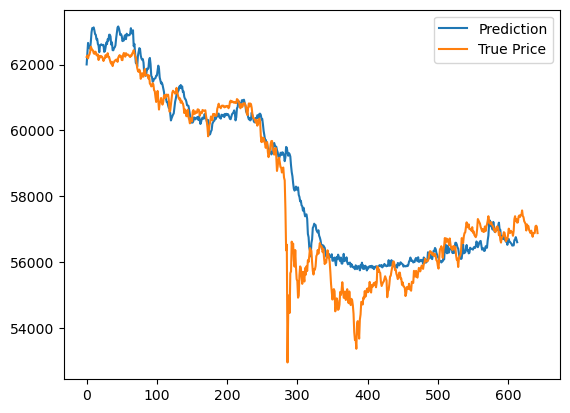

In [27]:
# Predict
preds_lstm = model_lstm.predict(windows_test)

# Remove standardization from predictions

preds_lstm_unstd = preds_lstm * std_df["midpoint"] + mean_df["midpoint"]


# Plot 
plt.plot(preds_lstm_unstd, label = "Prediction")
plt.plot(BTC_df["midpoint"][train_length + window_size:].reset_index(drop = True), label = "True Price")
plt.legend(loc="upper right")